In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import matplotlib.ticker as ticker

In [86]:
import numpy as np

In [8]:
abas = pd.ExcelFile(arquivo).sheet_names

In [9]:
COLUNAS = ["ANO", "AGREGACAO", "CODIGO", "NOME", "IDHM", "IDHM_L", "IDHM_E", "IDHM_R", "IDHMAD", "IDHMAD_L", "ESPVIDA"]

In [12]:
df_idhm = pd.read_excel(arquivo, sheet_name='Base de Dados', usecols=COLUNAS)
#print(df_idhm.columns)

In [10]:
df_cor = pd.read_excel(arquivo, sheet_name='COR')
#print(df_cor.columns)

In [11]:
df_sexo = pd.read_excel(arquivo, sheet_name='SEXO')
#print(df_sexo.columns)

In [139]:
#print(df_idhm.isnull().sum())
#print(df_cor.isnull().sum())
#print(df_sexo.isnull().sum())


In [138]:
#print(df_idhm.dtypes)
#print(df_cor.dtypes)
#print(df_sexo.dtypes)


In [143]:
#print(df_cor['AGREGACAO'].unique())
#print(df_sexo['SEXO'].unique())
#print(df_cor['COR'].unique())




### QUESTÕES E ANALISE DE COR/RAÇA

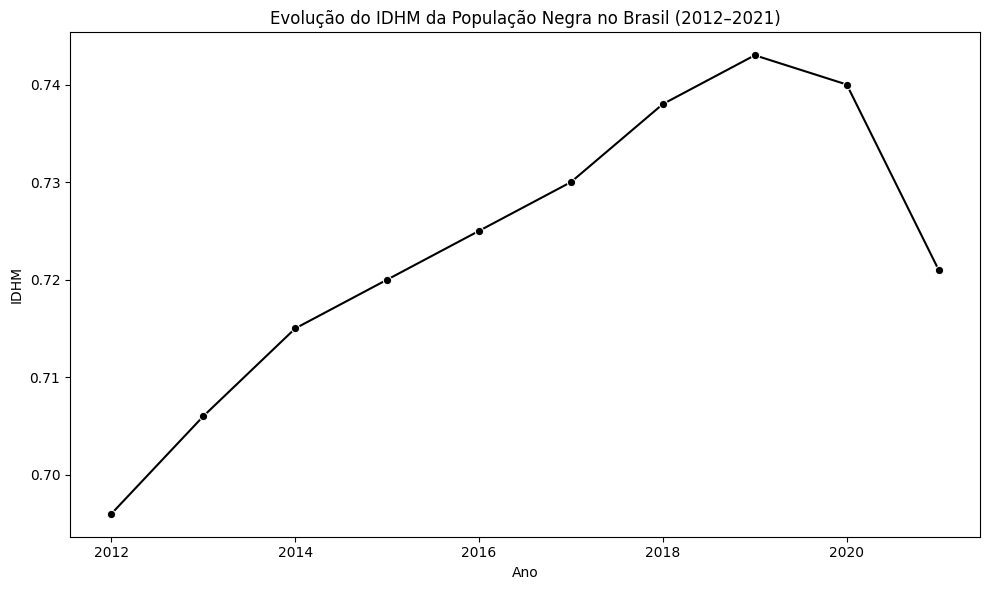

In [44]:
df_negra = df_cor[(df_cor['AGREGACAO'] == 'BRASIL') & (df_cor['COR'] == 'NEGRO')]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_negra, x='ANO', y='IDHM', marker='o', color='black')
plt.title('Evolução do IDHM da População Negra no Brasil (2012–2021)')
plt.ylabel('IDHM')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()

C:\Users\jessi\AppData\Local\Temp\ipykernel_26560\1033128342.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_branca_negra, x='COR', y='IDHM_R', palette=['#cccccc', '#000000'])


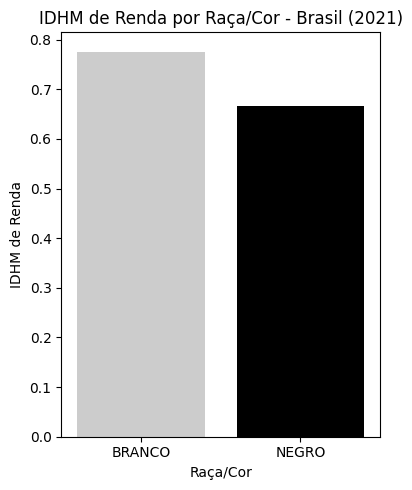

In [48]:
# Filtrar para 2021 e Brasil
df_2021 = df_cor[(df_cor['AGREGACAO'] == 'BRASIL') & (df_cor['ANO'] == 2021)]
df_branca_negra = df_2021[df_2021['COR'].isin(['BRANCO', 'NEGRO'])]

plt.figure(figsize=(4, 5))
sns.barplot(data=df_branca_negra, x='COR', y='IDHM_R', palette=['#cccccc', '#000000'])
plt.title('IDHM de Renda por Raça/Cor - Brasil (2021)')
plt.ylabel('IDHM de Renda')
plt.xlabel('Raça/Cor')
plt.tight_layout()
plt.show()


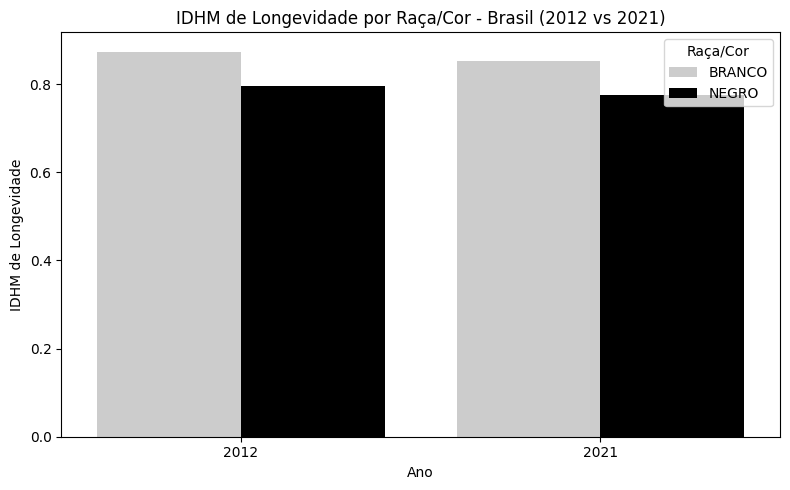

In [49]:
# Filtrar apenas os anos 2012 e 2021 para Branca e Negra
df_long = df_cor[(df_cor['AGREGACAO'] == 'BRASIL') & 
                 (df_cor['ANO'].isin([2012, 2021])) & 
                 (df_cor['COR'].isin(['BRANCO', 'NEGRO']))]

plt.figure(figsize=(8, 5))
sns.barplot(data=df_long, x='ANO', y='IDHM_L', hue='COR', palette=['#cccccc', '#000000'])
plt.title('IDHM de Longevidade por Raça/Cor - Brasil (2012 vs 2021)')
plt.ylabel('IDHM de Longevidade')
plt.xlabel('Ano')
plt.legend(title='Raça/Cor')
plt.tight_layout()
plt.show()


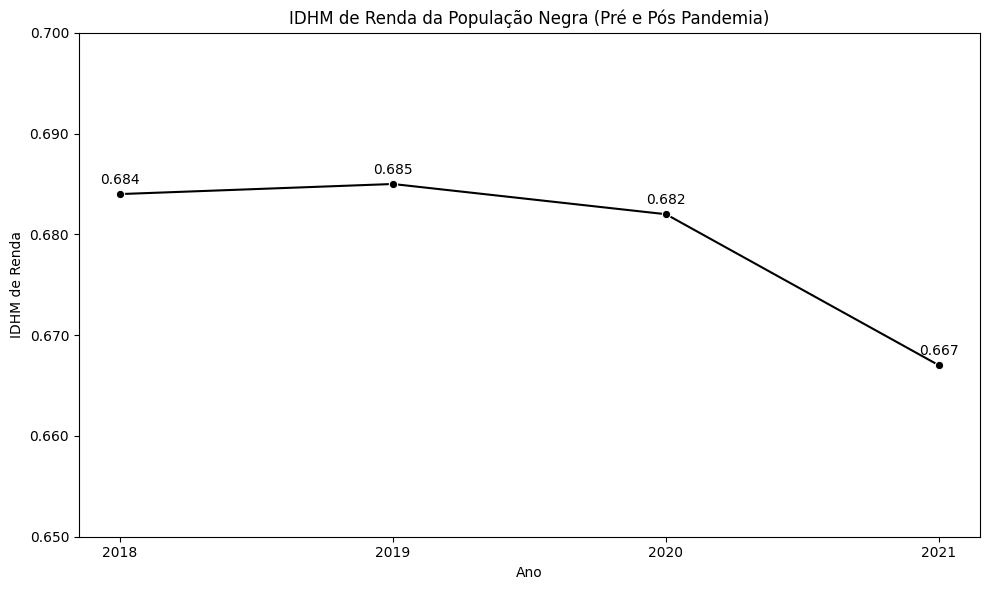

In [88]:
# Filtrar dados de 2018 a 2021 da população negra
df_pandemia = df_cor[(df_cor['AGREGACAO'] == 'BRASIL') & 
                     (df_cor['COR'] == 'NEGRO') & 
                     (df_cor['ANO'].isin([2018, 2019, 2020, 2021]))]

df_pandemia.loc[:, 'ANO'] = df_pandemia['ANO'].astype(int)
df_pandemia = df_pandemia.sort_values('ANO')

# Plotar
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pandemia, x='ANO', y='IDHM_R', marker='o', color='black')

for i, row in df_pandemia.iterrows():
    plt.text(row['ANO'], row['IDHM_R'] + 0.001, f"{row['IDHM_R']:.3f}", ha='center')

plt.ylim(0.650, 0.700)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))


plt.title('IDHM de Renda da População Negra (Pré e Pós Pandemia)')
plt.ylabel('IDHM de Renda')
plt.xlabel('Ano')
plt.xticks(df_pandemia['ANO'].unique())
plt.tight_layout()
plt.show()

### QUESTÕES E ANALISE DE SEXO/GÊNERO

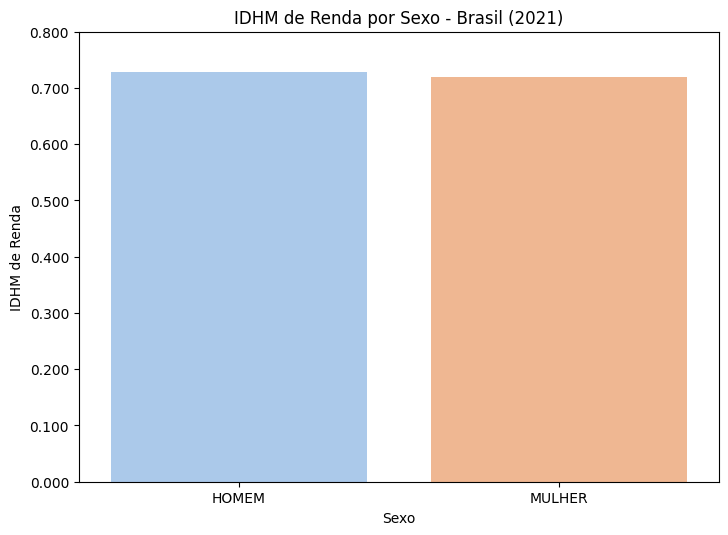

In [ ]:
df_2021 = df_sexo[(df_sexo['ANO'] == 2021) & (df_sexo['AGREGACAO'] == 'BRASIL')]

plt.figure(figsize=(8, 6))
sns.barplot(data=df_2021, x='SEXO', y='IDHM_R', hue='SEXO', palette='pastel', dodge=False, legend=False)

plt.ylim(0.000, 0.800)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

plt.title('IDHM de Renda por Sexo - Brasil (2021)')
plt.xlabel('Sexo')
plt.ylabel('IDHM de Renda')

plt.subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.15)

plt.show()


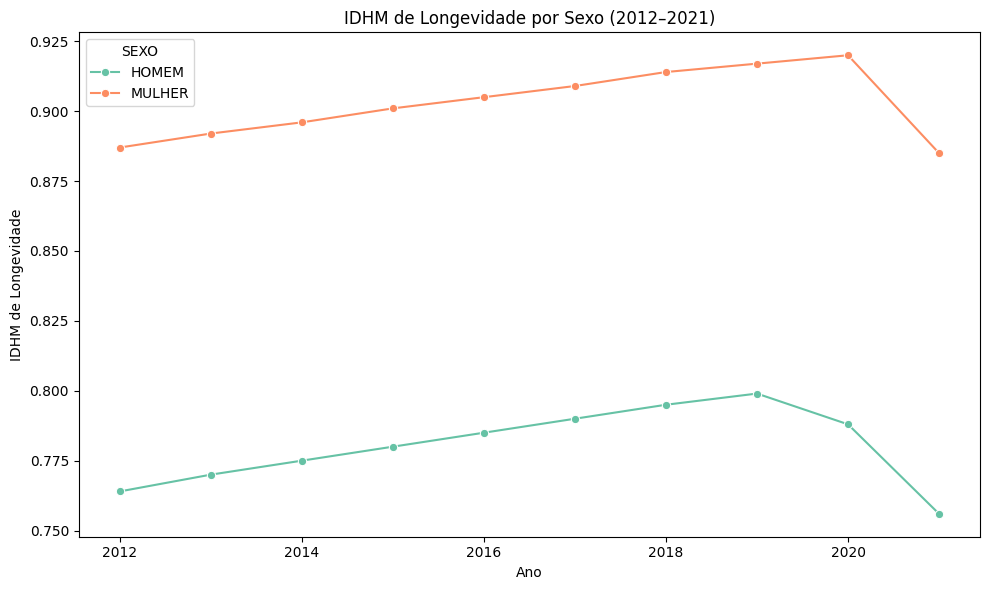

In [48]:
df_longev = df_sexo[(df_sexo['AGREGACAO'] == 'BRASIL') & (df_sexo['SEXO'].isin(['HOMEM', 'MULHER']))]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_longev, x='ANO', y='IDHM_L', hue='SEXO', marker='o', palette='Set2')

plt.title('IDHM de Longevidade por Sexo (2012–2021)')
plt.ylabel('IDHM de Longevidade')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()


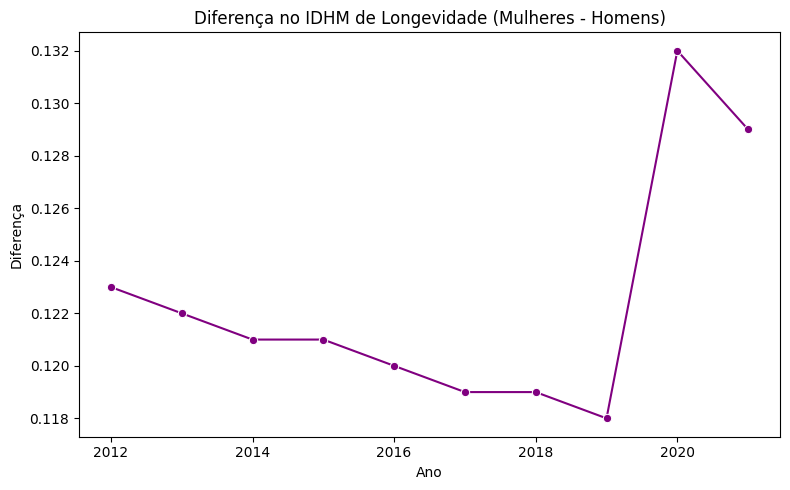

In [109]:
df_diff_longevidade = df_longev.pivot(index='ANO', columns='SEXO', values='IDHM_L')
df_diff_longevidade['diferença'] = df_diff_longevidade['MULHER'] - df_diff_longevidade['HOMEM']

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_diff_longevidade, x=df_diff_longevidade.index, y='diferença', marker='o', color='purple')

plt.title('Diferença no IDHM de Longevidade (Mulheres - Homens)')
plt.ylabel('Diferença')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()


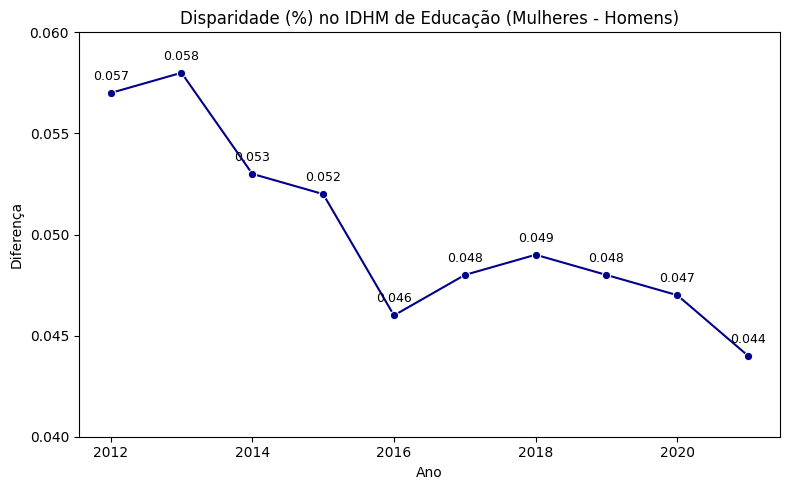

In [134]:
df_edu = df_sexo[(df_sexo['AGREGACAO'] == 'BRASIL') & (df_sexo['SEXO'].isin(['HOMEM', 'MULHER']))]

df_diff_edu = df_edu.pivot(index='ANO', columns='SEXO', values='IDHM_E')
df_diff_edu['diferença (%)'] = (df_diff_edu['MULHER'] - df_diff_edu['HOMEM'])

def frange(start, stop, step):
    while start < stop:
        yield start
        start += step
        
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_diff_edu, x=df_diff_edu.index, y='diferença (%)', marker='o', color='darkblue')

plt.ylim(0.040, 0.060)
plt.yticks([round(x, 3) for x in list(frange(0.040, 0.061, 0.005))])  
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

for ano, valor in df_diff_edu['diferença (%)'].items():
    plt.text(ano, valor + 0.0005, f'{valor:.3f}', ha='center', va='bottom', fontsize=9)

plt.title('Disparidade (%) no IDHM de Educação (Mulheres - Homens)')
plt.ylabel('Diferença')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()


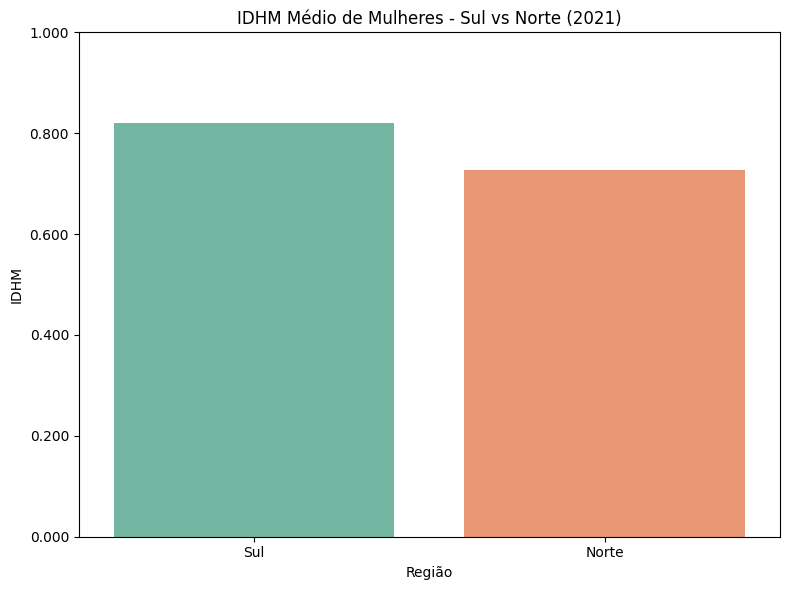

In [95]:
ufs_norte = ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins']
ufs_sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']

df_mulheres_2021 = df_sexo[
    (df_sexo['SEXO'] == 'MULHER') &
    (df_sexo['ANO'] == 2021) &
    (df_sexo['AGREGACAO'] == 'UF') 
]

idhm_sul = df_mulheres_2021[df_mulheres_2021['NOME'].isin(ufs_sul)]['IDHM'].mean()
idhm_norte = df_mulheres_2021[df_mulheres_2021['NOME'].isin(ufs_norte)]['IDHM'].mean()

df_regioes = pd.DataFrame({
    'Região': ['Sul', 'Norte'],
    'IDHM Médio (Mulheres)': [idhm_sul, idhm_norte]
})

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_regioes,
    x='Região',
    y='IDHM Médio (Mulheres)',
    hue='Região',          
    palette='Set2',
    legend=False          
)
plt.title('IDHM Médio de Mulheres - Sul vs Norte (2021)')
plt.ylabel('IDHM')
plt.xlabel('Região')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))


plt.tight_layout()
plt.show()


### QUESTÕES E ANALISE DE REGIÃO

In [52]:
regioes = {
    'Norte': ['Acre', 'Amazonas', 'Amapá', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

      Agrupamento      IDHM
0      Centro-Sul  0.770944
1  Norte/Nordeste  0.702508


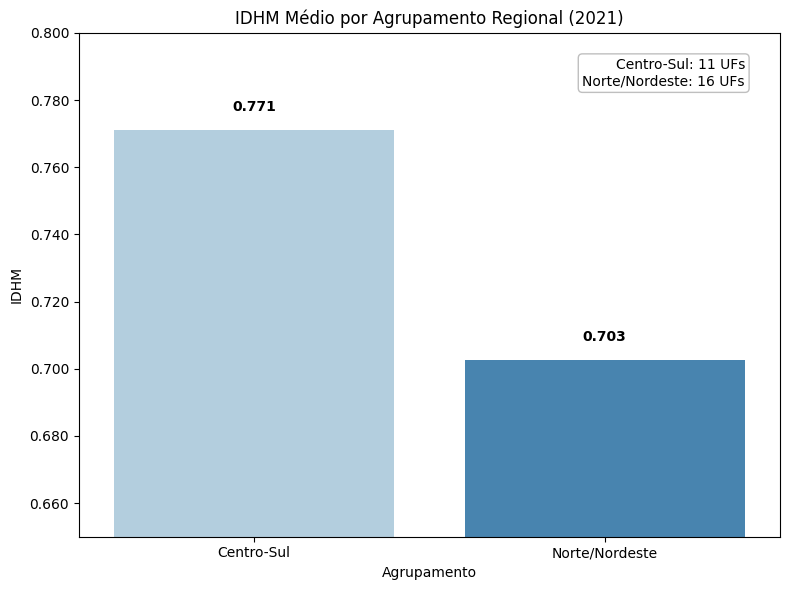

In [96]:
df_idhm['REGIAO'] = df_idhm['NOME'].map({uf: reg for reg, ufs in regioes.items() for uf in ufs})

df_regioes_2021 = df_idhm[(df_idhm['AGREGACAO'] == 'UF') & (df_idhm['ANO'] == 2021)]

media_regioes = df_regioes_2021.groupby('REGIAO')['IDHM'].mean().reset_index()
media_regioes['Agrupamento'] = media_regioes['REGIAO'].apply(
    lambda x: 'Norte/Nordeste' if x in ['Norte', 'Nordeste'] else 'Centro-Sul')
media_agrupada = media_regioes.groupby('Agrupamento')['IDHM'].mean().reset_index()
print(media_agrupada)

contagem_ufs = {
    'Norte/Nordeste': len(regioes['Norte']) + len(regioes['Nordeste']), 
    'Centro-Sul': len(regioes['Centro-Oeste']) + len(regioes['Sudeste']) + len(regioes['Sul']) 
}

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=media_agrupada, x='Agrupamento', y='IDHM', palette='Blues', hue='Agrupamento')

for i, row in media_agrupada.iterrows():
    ax.text(i, row['IDHM'] + 0.009, f"{row['IDHM']:.3f}", 
            ha='center', va='top', color='black', fontweight='bold')

info_text = "\n".join([
    f"Centro-Sul: {contagem_ufs['Centro-Sul']} UFs",
    f"Norte/Nordeste: {contagem_ufs['Norte/Nordeste']} UFs"
])

props = dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='gray',)
ax.text(0.95, 0.95, info_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=props)

plt.title('IDHM Médio por Agrupamento Regional (2021)')
plt.ylabel('IDHM')
plt.ylim(0.65, 0.80)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

plt.tight_layout()
plt.show()

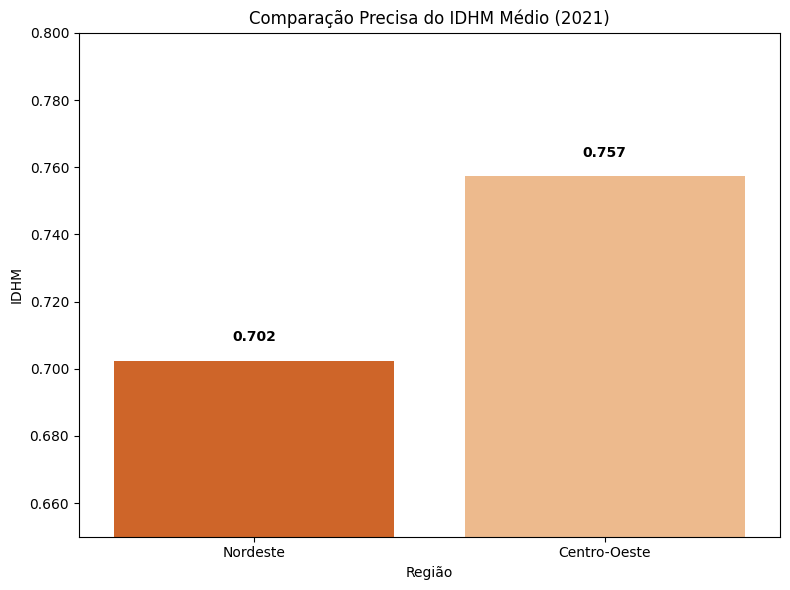

In [97]:
df_idhm['REGIAO'] = df_idhm['NOME'].map({uf: reg for reg, ufs in regioes.items() for uf in ufs})

df_regioes_2021 = df_idhm[(df_idhm['AGREGACAO'] == 'UF') & (df_idhm['ANO'] == 2021)]

media_regioes = df_regioes_2021[df_regioes_2021['REGIAO'].isin(['Nordeste', 'Centro-Oeste'])] \
    .groupby('REGIAO')['IDHM'].mean().reset_index()

contagem_ufs = {
    'Nordeste': len(regioes['Nordeste']),
    'Centro-Oeste': len(regioes['Centro-Oeste'])
}

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=media_regioes, x='REGIAO', y='IDHM', palette='Oranges', hue='REGIAO',
                 order=['Nordeste', 'Centro-Oeste'], 
                 estimator=np.mean, errorbar=None)  

for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width()/2., 
            height + 0.005,                      
            f"{height:.3f}",                      
            ha='center', va='bottom',              
            color='black',
            fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax.set_ylim(0.65, 0.80) 
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

plt.title('Comparação Precisa do IDHM Médio (2021)')
plt.xlabel('Região')
plt.ylabel('IDHM')
plt.tight_layout()
plt.show()

C:\Users\jessi\AppData\Local\Temp\ipykernel_9024\3903694667.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['IDHM Geral', 'Educação', 'Longevidade', 'Renda'])


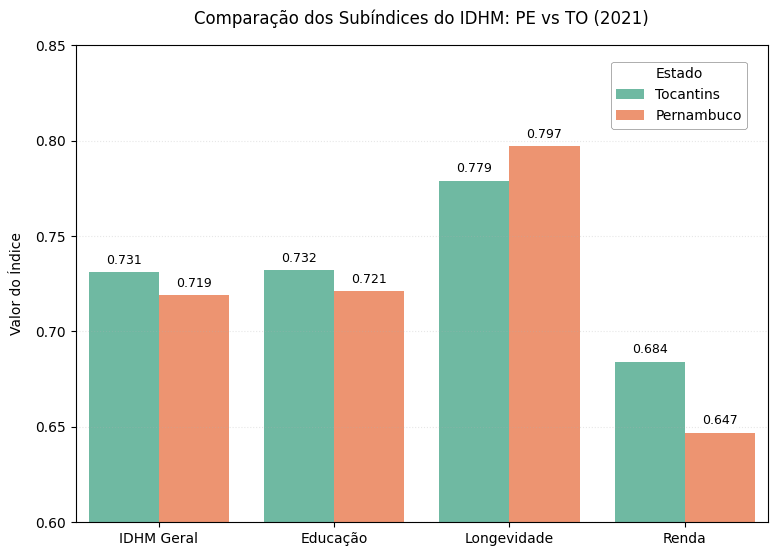

In [113]:
# Preparação dos dados
df_pe_to = df_regioes_2021[df_regioes_2021['NOME'].isin(['Pernambuco', 'Tocantins'])][['NOME', 'IDHM', 'IDHM_E', 'IDHM_R', 'IDHM_L']].copy()

# Transformação dos dados
df_pe_to_melt = df_pe_to.melt(id_vars='NOME', 
                             var_name='Indicador', 
                             value_name='Valor')

# Ordem e categorização
ordem_indicadores = ['IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']
df_pe_to_melt['Indicador'] = pd.Categorical(df_pe_to_melt['Indicador'],
                                          categories=ordem_indicadores,
                                          ordered=True)

plt.figure(figsize=(9, 5.5))
ax = sns.barplot(data=df_pe_to_melt,
                x='Indicador',
                y='Valor',
                hue='NOME',
                palette='Set2',
                saturation=0.8)

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # evita anotar barras "invisíveis"
        ax.text(
            patch.get_x() + patch.get_width()/2,
            height + 0.003,
            f"{height:.3f}",
            ha='center',
            va='bottom',
            color='black',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.5)
        )


# Configuração da legenda dentro do gráfico
leg = ax.legend(title='Estado', 
               loc='upper right',
               bbox_to_anchor=(0.98, 0.98),
               frameon=True,
               framealpha=0.9,
               edgecolor='gray')
leg.get_frame().set_linewidth(0.5)

ax.set_xticklabels(['IDHM Geral', 'Educação', 'Longevidade', 'Renda'])
plt.title('Comparação dos Subíndices do IDHM: PE vs TO (2021)', pad=15, fontsize=12)
plt.ylabel('Valor do Índice', labelpad=8, fontsize=10)
plt.xlabel('')
plt.ylim(0.60, 0.85)
plt.grid(axis='y', linestyle=':', alpha=0.3)

plt.tight_layout(pad=0.5)
plt.subplots_adjust(right=0.85)
plt.margins(x=0.02, y=0.02)  
plt.show()

C:\Users\jessi\AppData\Local\Temp\ipykernel_9024\3249084197.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['IDHM Geral', 'Educação', 'Longevidade', 'Renda'])
C:\Users\jessi\AppData\Local\Temp\ipykernel_9024\3249084197.py:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=0.5)


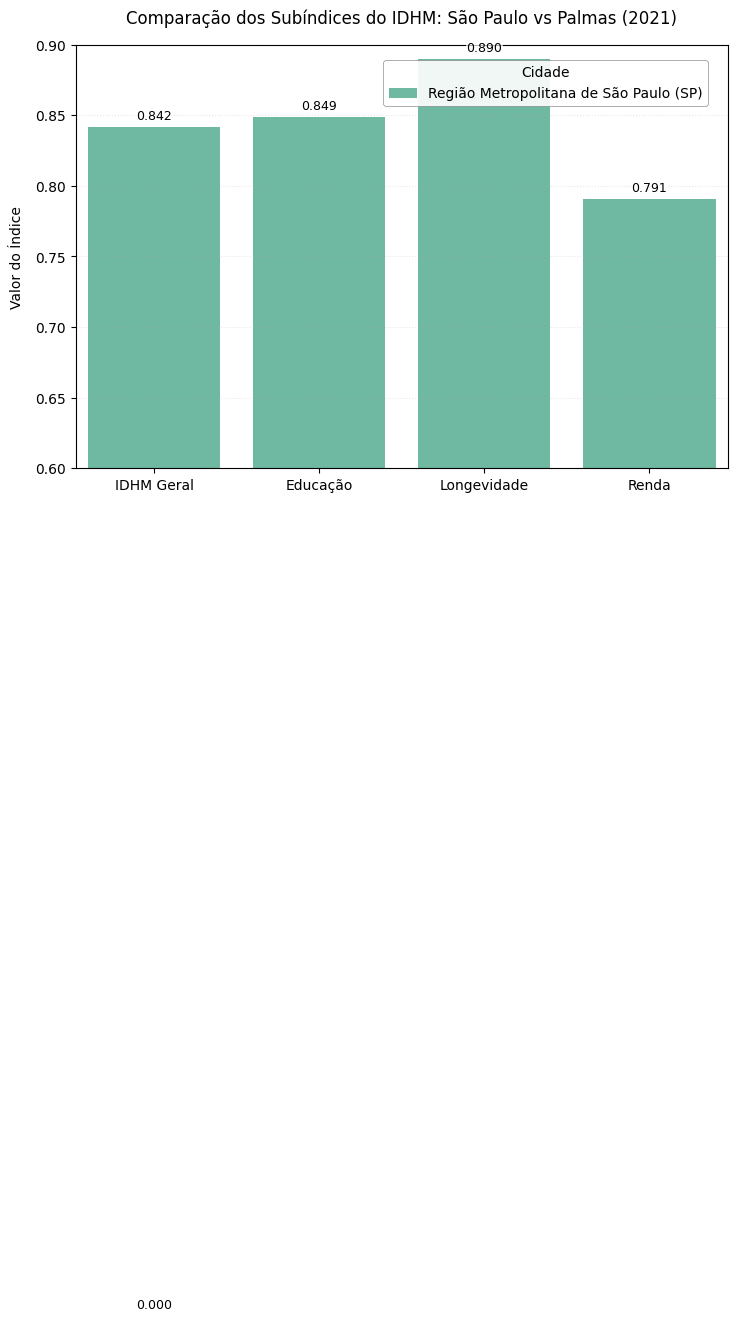

In [115]:
# Filtragem e preparação dos dados
df_cidades = df_idhm[
    (df_idhm['ANO'] == 2021) & 
    (df_idhm['AGREGACAO'] == 'RM_RIDE') & 
    (df_idhm['NOME'].isin(['Região Metropolitana de São Paulo (SP)', 'Região Metropolitana de Tocantins (TO)']))
][['NOME', 'IDHM', 'IDHM_E', 'IDHM_R', 'IDHM_L']].copy()

# Transformação dos dados
df_cidades_melt = df_cidades.melt(
    id_vars='NOME', 
    var_name='Indicador', 
    value_name='Valor'
)

# Ordem e categorização
ordem_indicadores = ['IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']
df_cidades_melt['Indicador'] = pd.Categorical(
    df_cidades_melt['Indicador'], 
    categories=ordem_indicadores,
    ordered=True
)

# Plotagem
plt.figure(figsize=(9, 5.5))
ax = sns.barplot(
    data=df_cidades_melt,
    x='Indicador',
    y='Valor',
    hue='NOME',
    palette='Set2',
    saturation=0.8
)

# Adicionando os valores nas barras
for patch in ax.patches:
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        patch.get_height() + 0.003,
        f"{patch.get_height():.3f}",
        ha='center',
        va='bottom',
        color='black',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.5)
    )

# Configuração da legenda
leg = ax.legend(
    title='Cidade',
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98),
    frameon=True,
    framealpha=0.9,
    edgecolor='gray'
)
leg.get_frame().set_linewidth(0.5)

# Ajustes finais
ax.set_xticklabels(['IDHM Geral', 'Educação', 'Longevidade', 'Renda'])
plt.title('Comparação dos Subíndices do IDHM: São Paulo vs Palmas (2021)', pad=15, fontsize=12)
plt.ylabel('Valor do Índice', labelpad=8, fontsize=10)
plt.xlabel('')
plt.ylim(0.60, 0.90)
plt.grid(axis='y', linestyle=':', alpha=0.3)

plt.tight_layout(pad=0.5)
plt.subplots_adjust(right=0.85)
plt.margins(x=0.02, y=0.02)
plt.show()


C:\Users\jessi\AppData\Local\Temp\ipykernel_9024\2516457625.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([n.split('de ')[1].split(' (')[0] for n in top_capitais['NOME']],


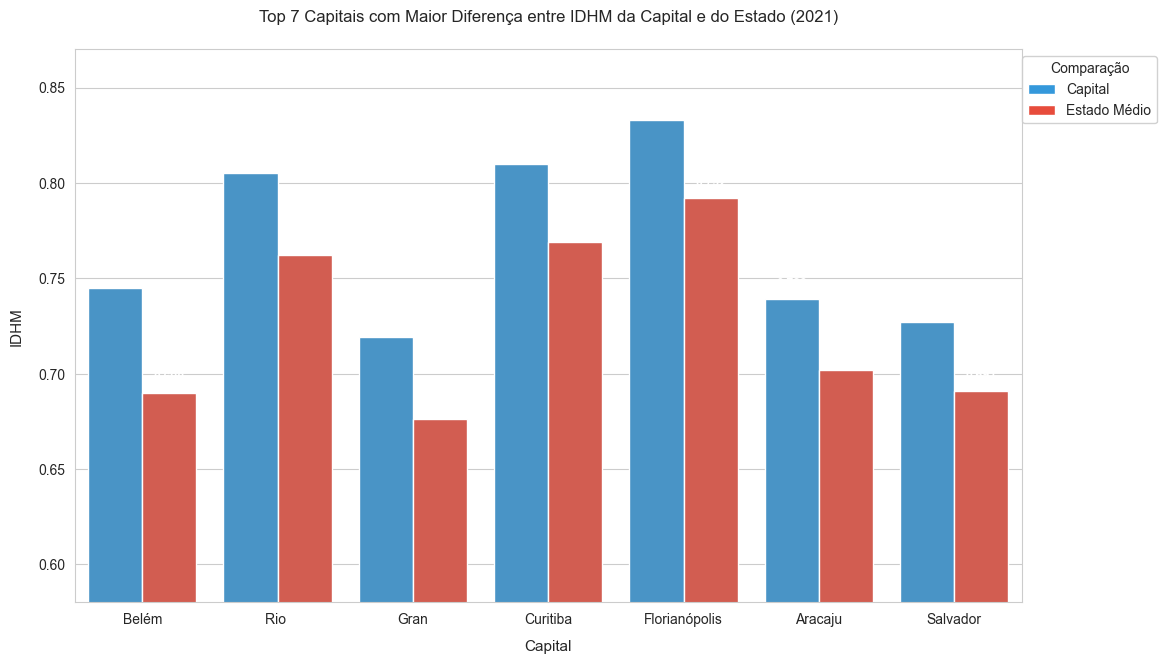

In [ ]:
from matplotlib.patches import Patch
import seaborn as sns
import matplotlib.pyplot as plt

# Dicionário de mapeamento
sigla_para_estado = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 
    'BA': 'Bahia', 'CE': 'Ceará', 'DF': 'Distrito Federal', 
    'ES': 'Espírito Santo', 'GO': 'Goiás', 'MA': 'Maranhão', 
    'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
    'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE': 'Pernambuco', 
    'PI': 'Piauí', 'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul', 'RO': 'Rondônia', 'RR': 'Roraima', 
    'SC': 'Santa Catarina', 'SP': 'São Paulo', 'SE': 'Sergipe', 
    'TO': 'Tocantins'
}

# Processamento dos dados
df_capitais = df_idhm[
    (df_idhm['AGREGACAO'] == 'RM_RIDE') & 
    (df_idhm['ANO'] == 2021) &
    (df_idhm['NOME'].str.contains('Região Metropolitana'))
].copy()

df_capitais['UF_SIGLA'] = df_capitais['NOME'].str.extract(r'\((\w{2})\)$')
df_capitais['UF_NOME'] = df_capitais['UF_SIGLA'].map(sigla_para_estado)

df_estados = df_idhm[
    (df_idhm['AGREGACAO'] == 'UF') & 
    (df_idhm['ANO'] == 2021) & 
    (df_idhm['NOME'].isin(df_capitais['UF_NOME'].unique()))
][['NOME', 'IDHM']].rename(columns={'NOME': 'UF_NOME', 'IDHM': 'IDHM_ESTADO'})

df_comparacao = df_capitais.merge(df_estados, on='UF_NOME')
df_comparacao['DIFERENCA'] = df_comparacao['IDHM'] - df_comparacao['IDHM_ESTADO']

top_capitais = df_comparacao.sort_values(by='DIFERENCA', key=abs, ascending=False).head(7)

# Configuração do gráfico
plt.figure(figsize=(12, 7))  # Aumentei a altura para melhor espaçamento
sns.set_style("whitegrid")

# Paleta de cores
paleta = {'IDHM': '#3498db', 'IDHM_ESTADO': '#e74c3c'}

# Plotagem
ax = sns.barplot(
    data=df_comparacao.melt(
        id_vars=['NOME', 'UF_NOME', 'DIFERENCA'],
        value_vars=['IDHM', 'IDHM_ESTADO'],
        var_name='TIPO',
        value_name='VALOR_IDHM'
    ),
    x='NOME',
    y='VALOR_IDHM',
    hue='TIPO',
    palette=paleta,
    order=top_capitais.sort_values('DIFERENCA', ascending=False)['NOME']
)

# Adicionar valores
for i, (_, row) in enumerate(top_capitais.iterrows()):
    ax.text(i-0.2, row['IDHM']+0.005, f"{row['IDHM']:.3f}", 
            ha='center', va='bottom', color='black', fontweight='bold', fontsize=9)
    ax.text(i+0.2, row['IDHM_ESTADO']+0.005, f"{row['IDHM_ESTADO']:.3f}", 
            ha='center', va='bottom', color='black', fontweight='bold', fontsize=9)
    

# Personalização dos eixos
ax.set_xticklabels([n.split('de ')[1].split(' (')[0] for n in top_capitais['NOME']], 
                  fontsize=10, rotation=0, ha='center')
plt.ylabel('IDHM', fontsize=11, labelpad=10)  # Aumentei o labelpad
plt.xlabel('Capital', fontsize=11, labelpad=10)  # Aumentei o labelpad
plt.ylim(0.58, 0.87)  # Ajuste para dar mais espaço

# Legenda
plt.legend(
    handles=[
        Patch(facecolor='#3498db', label='Capital'),
        Patch(facecolor='#e74c3c', label='Estado Médio')
    ],
    title='Comparação',
    bbox_to_anchor=(1.15, 1),
    loc='upper right',
    frameon=True,
    framealpha=0.9
)

plt.title('Top 7 Capitais com Maior Diferença entre IDHM da Capital e do Estado (2021)', 
          pad=20, fontsize=12)
plt.tight_layout(pad=2)  # Aumentei o padding geral
plt.show()


➡ Dados das Regiões Metropolitanas (Capitais):
                                                NOME UF_SIGLA  \
484           Região Metropolitana de São Paulo (SP)       SP   
486       Região Metropolitana de Florianópolis (SC)       SC   
485            Região Metropolitana de Curitiba (PR)       PR   
483      Região Metropolitana de Rio de Janeiro (RJ)       RJ   
481      Região Metropolitana de Belo Horizonte (MG)       MG   
482      Região Metropolitana de Grande Vitória (ES)       ES   
487        Região Metropolitana de Porto Alegre (RS)       RS   
489             Região Metropolitana de Goiânia (GO)       GO   
488  Região Metropolitana de Vale do Rio Cuiabá (MT)       MT   
477              Região Metropolitana de Recife (PE)       PE   
474           Região Metropolitana de Fortaleza (CE)       CE   
470               Região Metropolitana de Belém (PA)       PA   
475               Região Metropolitana de Natal (RN)       RN   
479             Região Metropolitana de Ar